# Summarize Metadata
Make a few quality-checks about the metadata to determine if it is processed correctly.

Early versions of the dataset lacked.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from battdat.data import CellDataset
from pathlib import Path
from tqdm import tqdm
import pandas as pd

Configuration

In [2]:
data_path = Path('data/hdf5/')

## Get the Anode and Cathode Metadata
Summarize by the counts of anode types and 

In [3]:
cell_descriptions = []
for file in data_path.glob('**/*h5'):
    metadata = CellDataset.get_metadata_from_hdf5(file).battery
    cell_descriptions.append({
        'cathode': metadata.cathode.name,
        'anode': metadata.anode.name,
        'electrolyte': metadata.electrolyte.name
    })
cell_descriptions = pd.DataFrame(cell_descriptions)

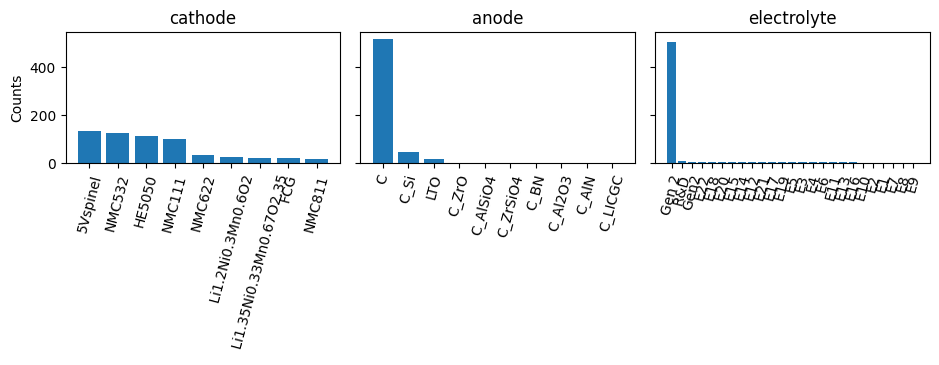

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(9.5, 3.75), sharey=True)

for c, ax in zip(cell_descriptions.columns, axs):
    counts = cell_descriptions[c].value_counts()
    
    ax.bar(range(len(counts)), counts)
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels([] + counts.index.tolist(), rotation=75)
    
    ax.set_title(c)
    
axs[0].set_ylabel('Counts')
fig.tight_layout()

## Print out test information
Get how much the batteries were cycled, how much they degraded, and the starting capacity

In [5]:
test_info = []
for file in tqdm(data_path.glob('**/*h5')):
    data = CellDataset.from_hdf(file, subsets=['cycle_stats'])
    test_info.append({
        'num_cycles': len(data.cycle_stats),
        'max_capacity': data.cycle_stats.capacity_charge.max(),
    })
test_info = pd.DataFrame(test_info)

602it [00:06, 86.95it/s] 


Text(0, 0.5, 'Counts')

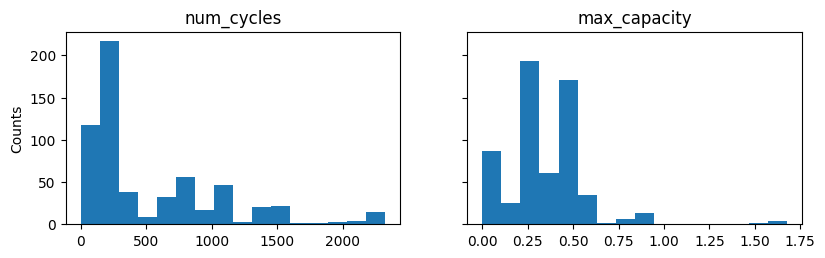

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(9.5, 2.5), sharey=True)

for c, ax in zip(test_info.columns, axs):
    
    ax.hist(test_info[c], bins=16)
    
    ax.set_title(c)
    
axs[0].set_ylabel('Counts')